# 📊 Gráficos para las diferencias entre genes pertenecientes al clúster de scytonemin


**Autor:** Johanna Atenea Carreon Baltazar  
**Contacto:** johannaatenea13@gmail.com 
**Fecha de última modificación:** junio de 2025

---

### 🎯 Objetivo

Visualizar la **distribución genómica de los genes del clúster de scytonemin** en los genomas del grupo de estudio donde se detectó su presencia, y analizar la distribución de sus **distancias (en número de genes)** para proponer modelos estadísticos adecuados que las describan.

---

### 📥 Entradas requeridas

- `resultados_en_numero_genes_scytonemin.pkl`:  
  Diccionario generado por el notebook `Diferencias_entre_duplicados_en_numero_genes_scytonemin.ipynb`, que contiene las diferencias (en número de genes) entre los genes del clúster en cada genoma.

- `diccionario.txt`:  
  Archivo con las posiciones ordenadas de los genes del clúster de scytonemin por genoma (en formato de diccionario de Python).

---

### 📤 Salidas generadas

- Histogramas de diferencias entre genes del clúster en número de genes.
- Modelos de ajuste estadístico sobre la distribución observada.
- Gráficos que muestran **cómo se distribuyen los genes del clúster a lo largo de cada genoma** donde se detectó scytonemin.

---

### 🧰 Librerías requeridas

```python
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast


In [15]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

## Resultados en el caso de que las diferencias se calcularon en número de genes

### Importar datos

### scytonemin

In [4]:
# Cargar el archivo .pkl
with open('resultados_en_numero_genes_scytonemin.pkl', 'rb') as file:
 resultados_diferencias_num_genes_scytonemin= pickle.load(file)

# Verificar el contenido
#print(type(genes_copia))  # Para saber qué tipo de objeto es
print(resultados_diferencias_num_genes_scytonemin)  # Muestra una parte del contenido

{1472755.9: [234, 1, 1, 1, 1, 1002, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 4, 1, 6136], 1618022.9: [3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 2, 1140, 896, 1608, 1, 1, 1, 1, 3508], 1751286.15: [1, 1, 2, 1, 1, 13, 3128, 2735], 1914872.23: [1, 14, 2, 1, 1, 1, 734, 4334], 2038116.21: [1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 4655, 479, 1, 1, 1, 2, 146, 3928], 2572090.7: [1, 1, 1, 1, 2541, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 3775, 1350], 2576902.6: [1, 1, 1, 1, 2724, 4602], 2576903.5: [1, 1, 1, 1, 2473, 1837, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2918], 2653204.7: [1, 3, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 362, 1, 1, 1, 1, 3215, 3035], 2764711.14: [1, 1, 2, 1, 15, 2212, 4416], 3025190.14: [1, 1, 1, 1, 1384, 1698, 884, 239, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2708], 3134896.7: [2, 1, 3, 1, 11, 1, 1, 14, 2147, 140, 1522, 1781, 2552], 3349875.4: [1, 3, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 451, 3727, 1, 1, 1, 1, 3004], 3349876.5: [1, 1,

### Histogramas entre genes duplicados consecutivos contadas en número de genes

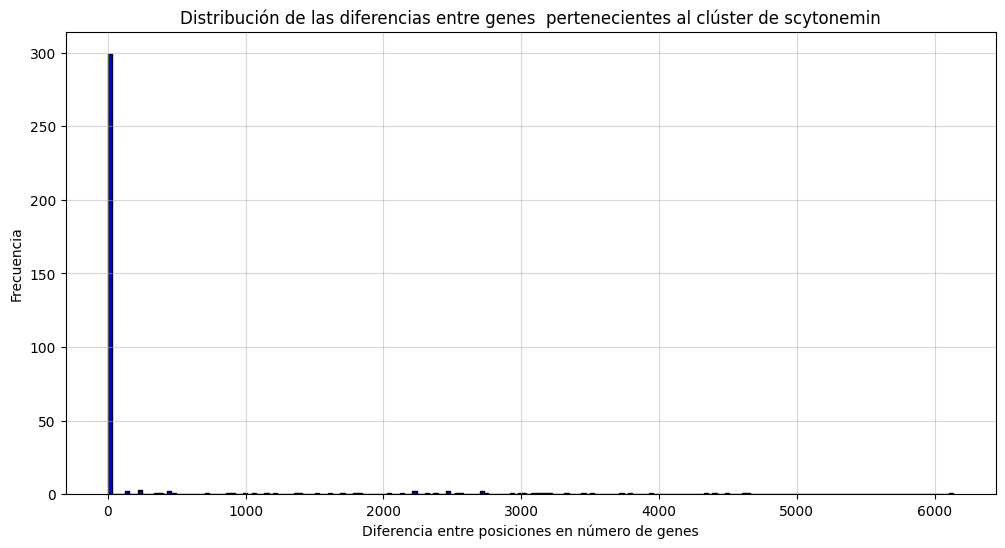

In [26]:
# Crear una lista con todas las diferencias
diferencias = [d for diferencias_genoma in resultados_diferencias_num_genes_scytonemin.values() for d in diferencias_genoma]


# Crear el histograma
plt.figure(figsize=(12, 6))
plt.hist(diferencias, bins=200, color='blue', edgecolor='black')
plt.title("Distribución de las diferencias entre genes  pertenecientes al clúster de scytonemin")
plt.xlabel("Diferencia entre posiciones en número de genes")
plt.ylabel("Frecuencia")
plt.grid(True, alpha=0.5)
plt.savefig("resultados/histograma_genes_cluster_scytonemin.png",dpi=150)
plt.show()


Resultados del ajuste:

Distribución       AIC  KS-Statistic  KS-pvalue             Parámetros
     lognorm -13234.04        0.4289        0.0   18.831, 1.000, 0.000
 weibull_min   2875.50        0.3720        0.0   0.291, 0.000, 18.327
       gamma   3054.17        0.4575        0.0 0.167, 0.000, 2164.000
       expon   4893.39        0.8115        0.0         1.000, 360.130


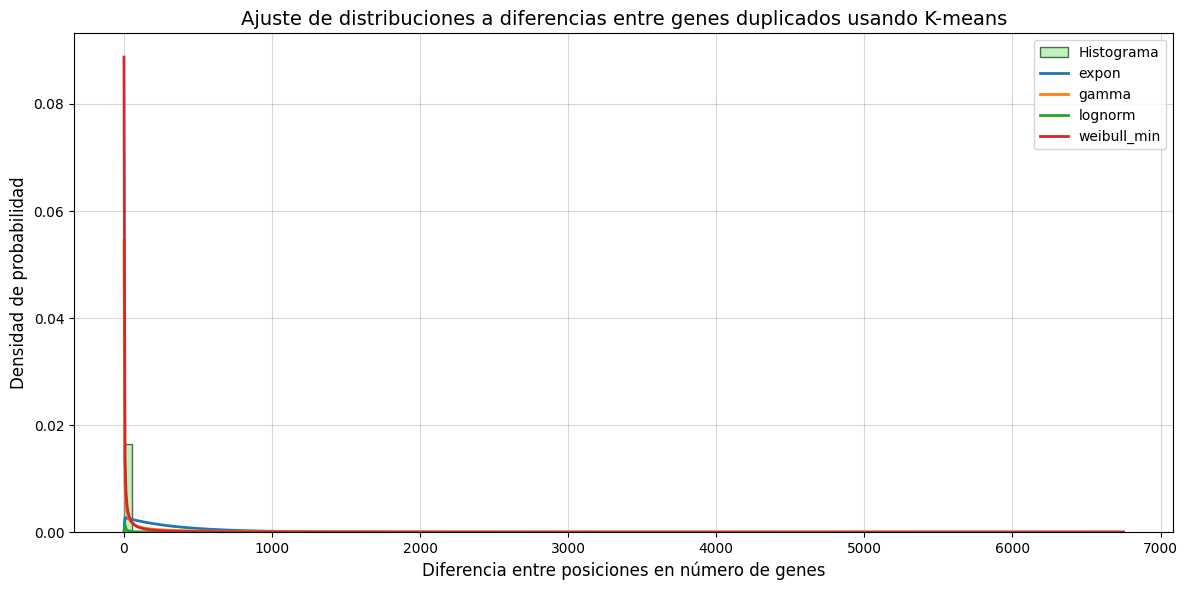

In [11]:
from scipy import stats
import scipy.stats as stats
# Crear la lista de diferencias
diferencias = [d for diferencias_genoma in resultados_diferencias_num_genes_scytonemin.values() for d in diferencias_genoma]
diferencias = np.array(diferencias)

# Filtrar valores no numéricos o extremos (si aplica)
diferencias = diferencias[np.isfinite(diferencias)]
diferencias = diferencias[diferencias > 0]  # Evita problemas con lognorm y gamma

# Definir distribuciones a probar
dist_names = ['expon', 'gamma', 'lognorm', 'weibull_min']
x = np.linspace(min(diferencias) * 0.9, max(diferencias) * 1.1, 1000)  # Expande ligeramente el rango de x

# Diccionario para almacenar los resultados
results = []

# Crear el histograma normalizado
plt.figure(figsize=(12, 6))
count, bins, _ = plt.hist(diferencias, bins=120, density=True, color='lightgreen', edgecolor='black', alpha=0.6, label="Histograma")

# Ajustar cada distribución y graficar
for dist_name in dist_names:
    dist = getattr(stats, dist_name)
    
    # Ajuste de parámetros (fuerza loc=0 para gamma y weibull_min si es necesario)
    if dist_name in ['gamma', 'weibull_min']:
        params = dist.fit(diferencias, floc=0)
    else:
        params = dist.fit(diferencias)

    # Validar si los parámetros generan valores razonables
    pdf_fitted = dist.pdf(x, *params)
    if np.any(np.isnan(pdf_fitted)) or np.max(pdf_fitted) > 10 * np.max(count): 
        print(f"Advertencia: {dist_name} tiene un ajuste no válido")
        continue
    
    # Graficar la distribución ajustada
    plt.plot(x, pdf_fitted, label=f"{dist_name}", linewidth=2)

    # Log-verosimilitud para AIC
    loglik = np.sum(dist.logpdf(diferencias, *params))
    k = len(params)  # Número de parámetros
    aic = 2 * k - 2 * loglik

    # Prueba de Kolmogorov-Smirnov
    ks_stat, ks_pvalue = stats.kstest(diferencias, dist_name, args=params)

    # Almacenar los resultados en el diccionario
    results.append({
        "Distribución": dist_name,
        "AIC": round(aic, 2),
        "KS-Statistic": round(ks_stat, 4),
        "KS-pvalue": round(ks_pvalue, 4),
        "Parámetros": ", ".join([f"{p:.3f}" for p in params])  # <<< Convertimos los parámetros a string legible
    })

# Mostrar resultados ordenados por AIC
df_resultados = pd.DataFrame(results).sort_values("AIC")
print("\nResultados del ajuste:\n")
print(df_resultados.to_string(index=False))  # <<< Mostramos como tabla sin el índice

# Mejorar la visualización
plt.title("Ajuste de distribuciones a diferencias entre genes duplicados usando K-means", fontsize=14)
plt.xlabel("Diferencia entre posiciones en número de genes", fontsize=12)
plt.ylabel("Densidad de probabilidad", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

## Gráficos de prueba

In [13]:
# tabla que contiene el numero de genes
numero_genes = pd.read_csv('numero_de_genes.csv')
print(numero_genes)

     genome_id  number_of_genes
0    103690.82             5854
1   1472755.90             7399
2   1618022.90             7179
3   1647413.14             5966
4   1751286.15             5882
5   1869241.20             6531
6   1914872.23             5088
7   2038116.21             9232
8    211165.20             7334
9   2490939.10             6410
10  2572090.70             7690
11  2576902.60             7330
12  2576903.50             7252
13  2576904.60             6433
14  2653204.70             6637
15   272123.44             6072
16  2764711.14             6648
17    28072.26             6098
18  2914041.10             5991
19  3025190.14             6937
20  3134896.70             8176
21   317936.27             5929
22  3349875.40             7207
23  3349876.50             6605
24   446679.11             6802
25   449208.14             7442
26    46234.36             4261
27    63737.69             7857
28    76335.23             6838


In [17]:
with open("diccionario.txt", "r") as f:
    genes = ast.literal_eval(f.read())
#quitar comillas
genes_scytonemin1 = {float(k): v for k, v in genes.items()}
#ordenar valores de cada clave
genes_scytonemin = {k: sorted(v) for k, v in genes_scytonemin1.items()}
print(genes_scytonemin)

{1472755.9: [5043, 5277, 5278, 5279, 5280, 5281, 6283, 6285, 6286, 6287, 6288, 6289, 6290, 6291, 6292, 6293, 6294, 6295, 6297, 6298, 6299, 6301, 6305, 6306], 1618022.9: [2287, 2290, 2291, 2292, 2293, 2295, 2296, 2297, 2298, 2299, 2300, 2301, 2304, 2306, 2307, 2308, 2310, 3450, 4346, 5954, 5955, 5956, 5957, 5958], 1751286.15: [1871, 1872, 1873, 1875, 1876, 1877, 1890, 5018], 1914872.23: [3613, 3614, 3628, 3630, 3631, 3632, 3633, 4367], 2038116.21: [800, 801, 803, 804, 805, 807, 808, 809, 811, 812, 813, 814, 815, 816, 818, 819, 5474, 5953, 5954, 5955, 5956, 5958, 6104], 2572090.7: [455, 456, 457, 458, 459, 3000, 3001, 3003, 3004, 3005, 3007, 3008, 3009, 3010, 3010, 3011, 3012, 3014, 3015, 3016, 3017, 3019, 3020, 6795], 2576902.6: [345, 346, 347, 348, 349, 3073], 2576903.5: [2814, 2815, 2816, 2817, 2818, 5291, 7128, 7129, 7132, 7133, 7134, 7135, 7136, 7137, 7138, 7139, 7140, 7141, 7142, 7143, 7144, 7145, 7146, 7147, 7148], 2653204.7: [2204, 2205, 2208, 2209, 2210, 2211, 2213, 2215, 2216, 

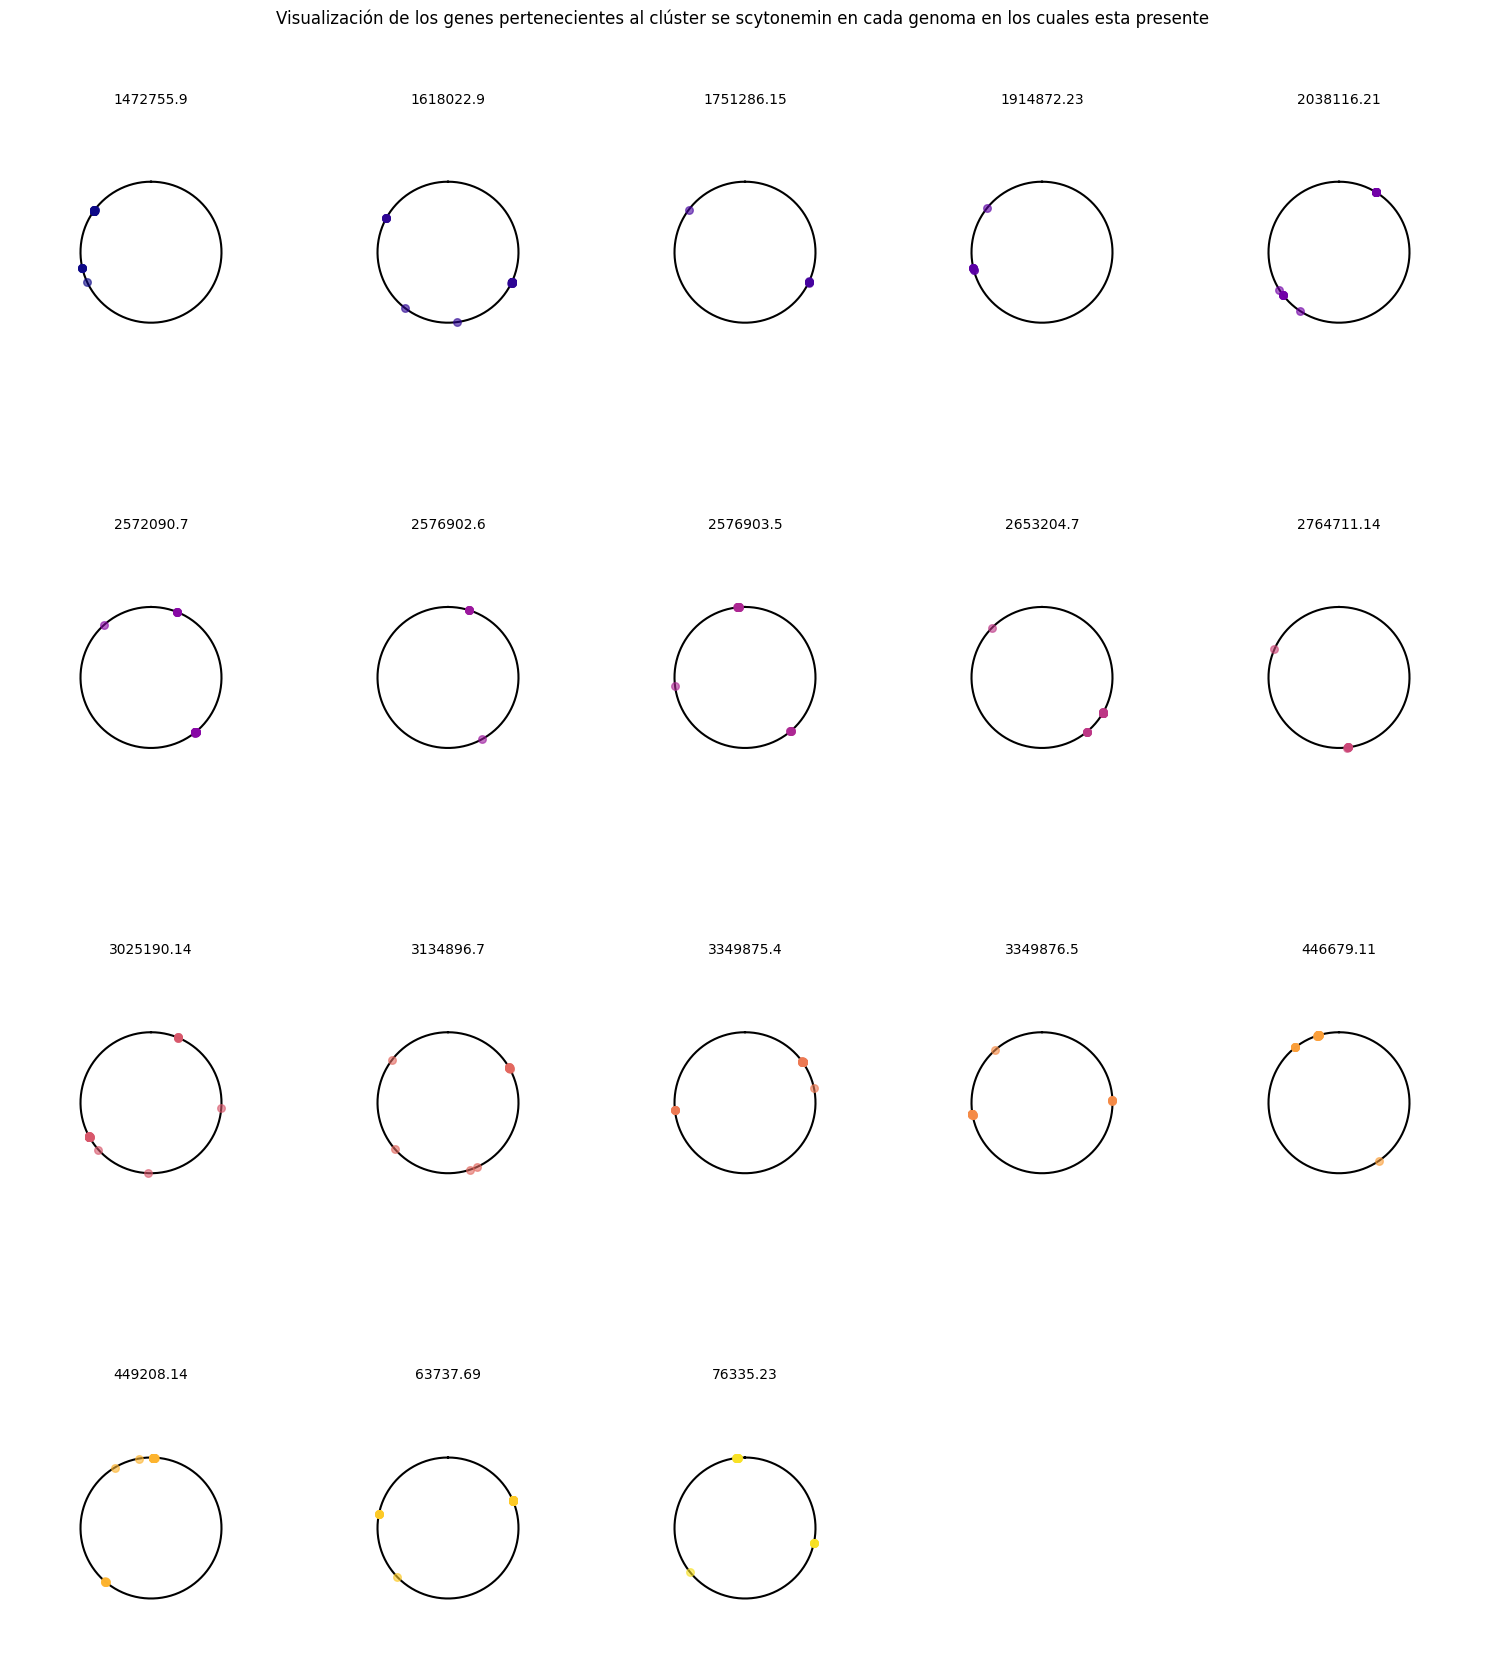

In [29]:
# Configurar subplots (ajusta según el número total de genomas a graficar)
num_genomas = len(genes_scytonemin)
filas = 4
columnas = 5
fig, axes = plt.subplots(nrows=filas, ncols=columnas, figsize=(15, 18), subplot_kw={'projection': 'polar'})
plt.suptitle('Visualización de los genes pertenecientes al clúster se scytonemin en cada genoma en los cuales esta presente ')
axes = axes.flatten()

# Recorrer genomas y graficar
for i, (genome_id, gene_positions) in enumerate(genes_scytonemin.items()):
    if i >= len(axes):
        break  # Evita error si hay más genomas que subplots

    ax = axes[i]

    # Buscar longitud total del genoma en número de genes
    if genome_id not in numero_genes['genome_id'].values:
        print(f"Genoma {genome_id} no encontrado en numero_genes")
        continue
    
    genome_length = numero_genes[numero_genes['genome_id'] == genome_id]['number_of_genes'].values[0]

    # Convertir posiciones a ángulos
    angles = [2 * np.pi * pos / genome_length for pos in gene_positions]

    # Color para este genoma
    cmap = plt.cm.plasma
    color = cmap(i / num_genomas)

    # Configuración del gráfico polar
    ax.set_theta_direction(-1)
    ax.set_theta_offset(np.pi / 2)

    # Dibujar los genes como puntos
    ax.scatter(angles, [1] * len(angles), color=color, s=30, alpha=0.6, zorder=2)

    # Dibujar el círculo base
    theta = np.linspace(0, 2 * np.pi, 100)
    ax.plot(theta, np.ones_like(theta), color='black', linewidth=1.5, zorder=1)

    # Estética del gráfico
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['polar'].set_visible(False)
    ax.set_title(str(genome_id), fontsize=10)

# Ocultar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
# Ajustar el espacio entre los subplots
plt.tight_layout()
plt.savefig("resultados/scytonemin_polar_genes.png", dpi=150)
plt.show()

In [48]:
%autosave 30

Autosaving every 30 seconds
